# **EXPLORING FACTORS INFLUENCING STUDENT PERFORMANCE**

**Data Cleaning** and **Exploratory Data Analysis** are the foundation of robust data analysis and predictive modeling. In this project, we will walk through the data cleaning process, addressing missing values, format and discrepancies in the data. Then we will move forward with EDA to better understand the distribution and key variables that will shape insights. 

# **DATA CLEANING AND PREPARATION**

In [39]:
#importing important libraries such as pandas and numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Let's load the csv file into dataframe
df = pd.read_csv(r"C:\Users\19407\Desktop\Tanaya's Port. project datasets\Studentsperformancefactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
#Examining the number of observations in the dataset
df.shape

(6607, 20)

In [6]:
#Lets see the datatypes for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
#Lets check the data for any empty cells
missing_values = df.isnull().sum()
print(missing_values)

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


### **Replacing the missing values with 'Unknown' for Categorical Variables**

In [30]:
#As we can see there are some categorical variables which have missing values, lets replace them with their respective modes
#Teacher Quality
df['Teacher_Quality'].fillna('Unknown',inplace = True)

#Distance_From_home
df['Distance_from_Home'].fillna('Unknown',inplace = True)

#Parental_Education_level
df['Parental_Education_Level'].fillna('Unknown',inplace = True)

#Check again for any missing values
missing_values = df.isnull().sum()
print(missing_values)                            


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


### **Checking for Duplicates**

In [17]:
duplicates = df.duplicated()
print(duplicates.sum())

0


### **Checking for Outliers**

<Axes: xlabel='Hours_Studied'>

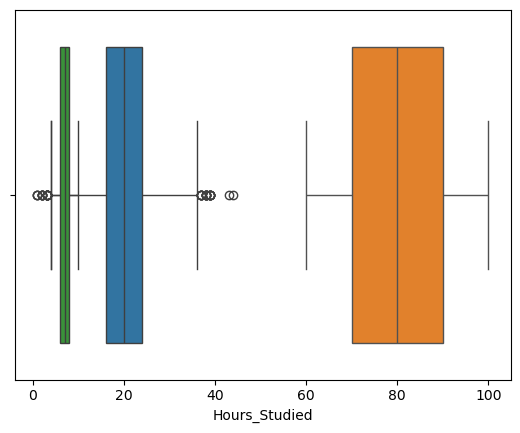

In [20]:
#Using seaborn library to make a boxplot
sns.boxplot(x = df ['Hours_Studied'])
sns.boxplot(x = df ['Attendance'])
sns.boxplot(x = df ['Sleep_Hours'])
#looks like there are no outliers in our numerical variables


### **Convert Categorical Columns to 'category'**

# **EXPLORATORY DATA ANALYSIS**

In [24]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## **UNIVARIATE ANALYSIS**

In [27]:
#Lets check the value_counts for gender as a categorical variable
df['Gender'].value_counts()


Gender
Male      3814
Female    2793
Name: count, dtype: int64

In [32]:
#Lets loop through each categorical columns to see the distribution
categorical_columns = df.select_dtypes(include = ['object','category']).columns
for col in categorical_columns:
    print(f'Distribution for {col} : ')
    print(df[col].value_counts())
    print("\n")

Distribution for Parental_Involvement : 
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64


Distribution for Access_to_Resources : 
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64


Distribution for Extracurricular_Activities : 
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64


Distribution for Motivation_Level : 
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64


Distribution for Internet_Access : 
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64


Distribution for Family_Income : 
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64


Distribution for Teacher_Quality : 
Teacher_Quality
Medium     3925
High       1947
Low         657
Unknown      78
Name: count, dtype: int64


Distribution for School_Type : 
School_Type
Public     4598
Private    2009
Name: count, dtype: int64


Distri

### **Histogram**

Text(0.5, 0, 'Scores')

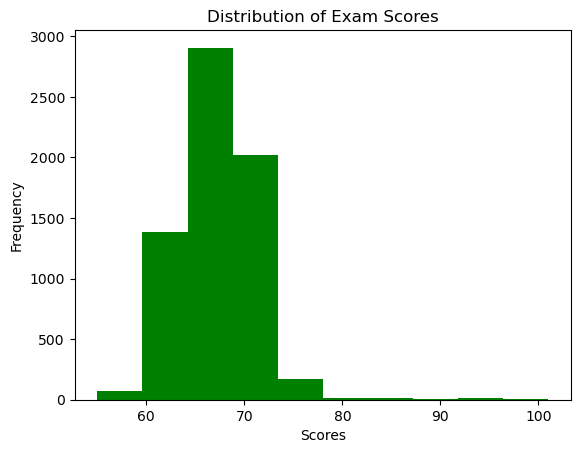

In [82]:
df['Exam_Score'].plot(kind = 'hist',color = 'green')
plt.title('Distribution of Exam Scores')
plt.xlabel('Scores')



## **MULTIVARIATE ANALYSIS**

### **Visualizations for Categorical Variables**

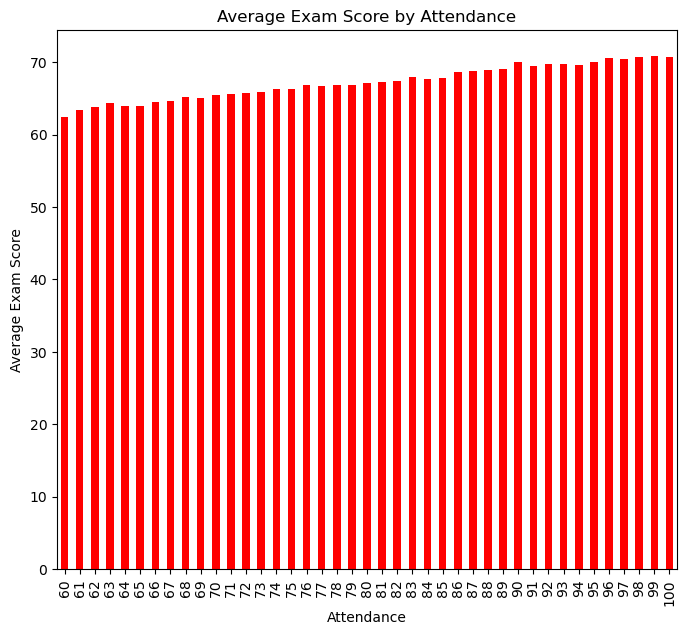

In [118]:
#Bar chart to see the distribution of Attendance on Exan scores

#Group the data by Attendance and calculate the exam score mean
grouped_data = df.groupby('Attendance')['Exam_Score'].mean()

#Create the bar chart
plt.figure(figsize = (8,7))
grouped_data.plot(kind = 'bar', color = 'red')

plt.title('Average Exam Score by Attendance')
plt.xlabel('Attendance')
plt.ylabel('Average Exam Score')

plt.show()

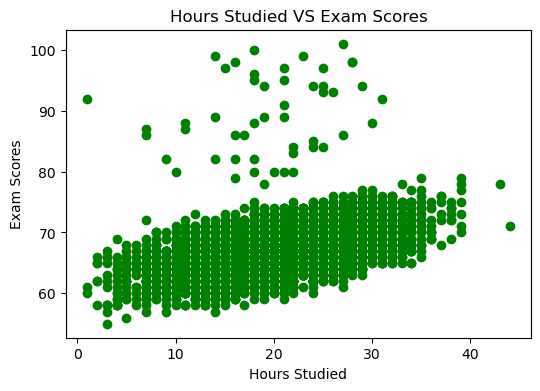

In [57]:
#Scatter plot for Hours_studied vs Exam_Score
plt.figure(figsize = (6,4))
plt.scatter(df['Hours_Studied'],df['Exam_Score'], color = 'green')
plt.title('Hours Studied VS Exam Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.show()

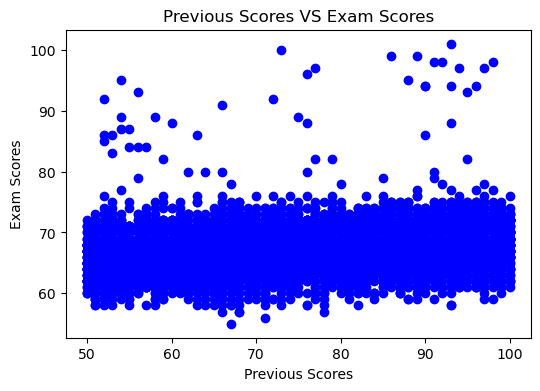

In [61]:
#Attendance VS Exam Scores
plt.figure(figsize = (6,4))
plt.scatter(df['Previous_Scores'],df['Exam_Score'], color = 'blue')
plt.title('Previous Scores VS Exam Scores')
plt.xlabel('Previous Scores')
plt.ylabel('Exam Scores')
plt.show()

### **Correlation Matrix**

***Question*** : *How do some of the numerical variables effect the exam scores? Which variables correlate to the exam scores?*

                   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Hours_Studied           1.000000   -0.009908     0.010977         0.024846   
Attendance             -0.009908    1.000000    -0.015918        -0.020186   
Sleep_Hours             0.010977   -0.015918     1.000000        -0.021750   
Previous_Scores         0.024846   -0.020186    -0.021750         1.000000   
Tutoring_Sessions      -0.014282    0.014324    -0.012216        -0.013122   
Physical_Activity       0.004624   -0.022435    -0.000378        -0.011274   
Exam_Score              0.445455    0.581072    -0.017022         0.175079   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied              -0.014282           0.004624    0.445455  
Attendance                  0.014324          -0.022435    0.581072  
Sleep_Hours                -0.012216          -0.000378   -0.017022  
Previous_Scores            -0.013122          -0.011274    0.175079  
Tutoring_Sessions        

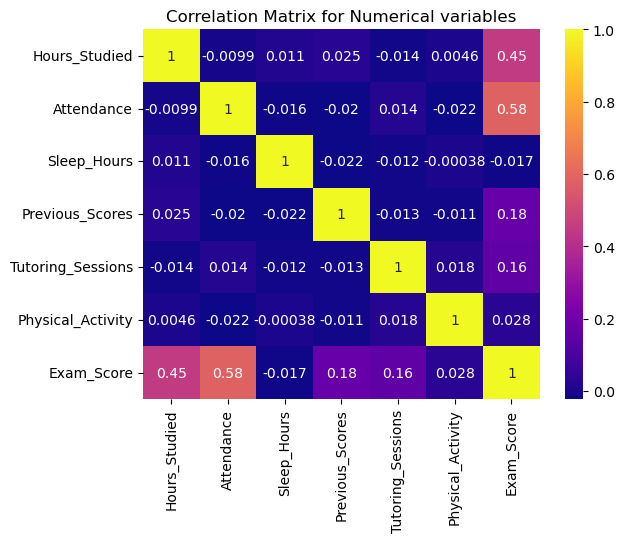

In [89]:
#Correlation between all numerical variables and exam score to see which one effects the exam scores the most
correlation_matrix = df[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']].corr()
print(correlation_matrix)

#Correlations matrix
sns.heatmap(correlation_matrix,annot=True,cmap ='plasma')
plt.title('Correlation Matrix for Numerical variables')
plt.show()


### **Regression Plot**

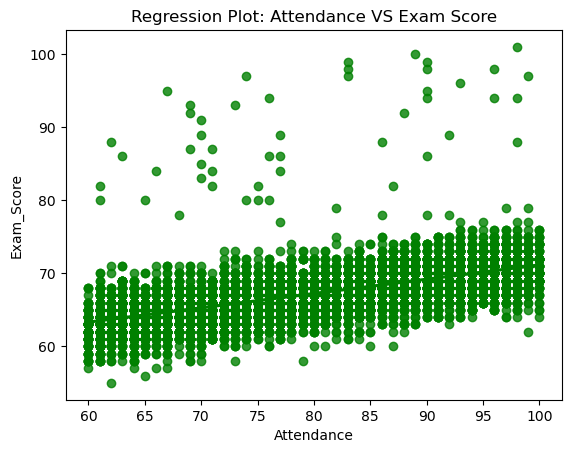

In [77]:
#Scatter Plot with a regression line for hours studied vs Exam Score
sns.regplot(x='Attendance', y='Exam_Score', data = df, color='green')
plt.title('Regression Plot: Attendance VS Exam Score')
plt.show()

***Question*** : *Does the number of sleep hours affect student performance in exams?*

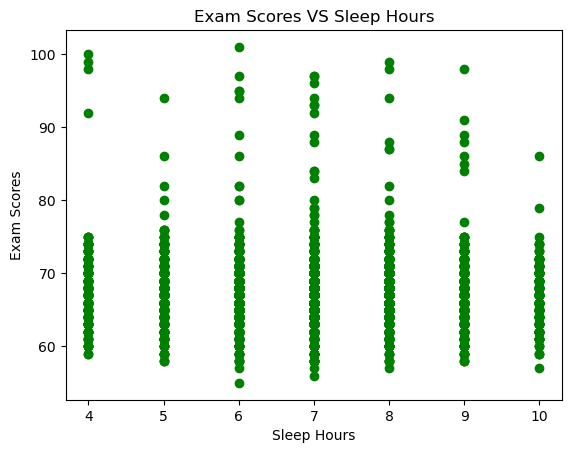

In [120]:
plt.scatter(df['Sleep_Hours'],df['Exam_Score'],color = 'green')
plt.title('Exam Scores VS Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Scores')
plt.show()